# TP Analyse de l'enrichissement en pathway Gene Ontology


## Jeux de données
* Experimental dataset as TSV
* Go ontology as [owl](http://www.obofoundry.org/ontology/go.html)
* Uniprot entries as XML files

### Manipulation de l'ontologie
* Annotation des protéines
* API de l'objet arbre

### Construction de l'analyse d'enrichissement en termes GO
* **Questions:**
    * Les protéines très abondantes présentent-elles des termes GO en quantité remarquable ?
    * Les protéines peu abondantes présentent-elles des termes GO en quantité remarquable ?


1. Découverte de la modélisation hypergéometrique des fréquences attendues des termes GO
2. Implémentation du test d'enrichissement d'un terme GO
3. Application du test à l'arbre des termes GO
4. Affichage **riche** des resultats du test dans le notebook

    
    
## Ressources
https://www.bioconductor.org/help/course-materials/2015/SeattleApr2015/E_GeneSetEnrichment.html
    
## Pour aller plus loin (TP5)
Visualisation de l'arbre des termes GO avec représentation des protéines et pValue d'enrichissement

## Remarque
Pour faciliter le développement nous considerereons comme **S**ur**A**bondante toute protéine à **Log2 Corrected Abundance Ratio** supérieur à 0.

##### IFB Virtual Machine Configuration

* `rootDir` points to Jupyter Home Directory
* `projectDir` points to the Git project, holds the *tsv* file
* `libDir` points to Git project python library with files names `go.py  stat_utils.py  uniprot.py`
* `dataDir` points to shared data folder with uniprot and GO files

In [4]:
import sys

homeDir = "/Users/guillaumelaunay/work/enseignements/current_content/UCBL/Bioinformatics/M2/_VDB"
projectDir = homeDir + "/VDB_jupyter"
libDir = projectDir + "/lib"
dataDir= projectDir +  "/data" 

sys.path.append(libDir)
#sys.path.append(libDir + '/pyproteins/src')
#sys.path.append(libDir + '/pyproteinsExt/src')

In [2]:
%load_ext autoreload
%autoreload 2

In [5]:
import pandas, uniprot, go
import numpy as np
from stat_utils import computeORA, GO_ORA_analyser


* Owlready2 * Warning: optimized Cython parser module 'owlready2_optimized' is not available, defaulting to slower Python implementation


In [6]:
%matplotlib nbagg
import matplotlib.pyplot as plt

## Lecture des données d'abondance

### Format des données expérimentales

Le terme *SA*, désigne le ratio de (**S**ur) **A**bondance pour une protéines entre deux experiences.
Les valeurs de **SA** sont stockées dans la colonne ```Log2 Corrected Abundance Ratio```. Un "ratio" négatif indique qu'une protéine est moins présente dans l'experience considéré par rapport à une experience de référence.

* La condition experimentale de référence est un milieu de croissance bactérienne
* La condition experimentale testée est un milieu riche en Tétracycline 



### Lecture des valeurs experimentales
Charger ```TCL_wt1.tsv``` dans une [dataframe pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).
* Retirer les lignes présentant des aberrations numériques
* Créer une DataFrame ne contenant que les lignes où **Log2 Corrected Abundance Ratio** > 0

In [5]:
import pandas
import numpy as np

df=pandas.read_csv(projectDir + "/TCL_wt1.tsv", delimiter ="\t", na_values="#VALEUR!",
                  dtype= {"Accession": str, "Description" : str, "GeneSymbol": str,
                             "Corrected Abundance ratio (1.53)": np.float64,
                              "Log2 Corrected Abundance Ratio" : np.float64,
                              "Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT)" : np.float64,
                              "LOG10 Adj.P-val" : np.float64
                             }).dropna()
df.head()

,Accession,Description,Gene Symbol,Corrected Abundance ratio (1.53),Log2 Corrected Abundance Ratio,Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT),LOG10 Adj.P-val
0,P75936,Basal-body rod modification protein FlgD OS=Es...,flgD,0.075817,-3.721335,0.000055,4.260067
1,P76231,Uncharacterized protein YeaC OS=Escherichia co...,yeaC,0.092810,-3.429569,0.000351,3.454627
2,P0A8S9,Flagellar transcriptional regulator FlhD OS=Es...,flhD,0.102614,-3.284695,0.000027,4.571899
4,P05706,PTS system glucitol/sorbitol-specific EIIA com...,srlB,0.108497,-3.204277,0.019963,1.699768
5,P29744,Flagellar hook-associated protein 3 OS=Escheri...,flgL,0.124183,-3.009460,0.036746,1.434787


In [6]:
goFile = f"{dataDir}/go.owl"
proteomeDirectory= f"{dataDir}/K12_proteome"
experimentalProteinDirectory= f"{dataDir}/dataset"
analyser = GO_ORA_analyser(goFile, proteomeDirectory, experimentalProteinDirectory)

Loading ontology
Loaded
Reading whole proteome
4391 Loaded
reading experimental protein set
2024 Loaded


In [28]:
saList = df[ df['Log2 Corrected Abundance Ratio'] > 0.0 ]['Accession'].tolist()
a = analyser.biological_process(saList)
b = analyser.molecular_function(saList)
c = analyser.cellular_component(saList)

Evaluated 262 / 262 Pathways, based on 44 proteins
Evaluated 92 / 92 Pathways, based on 44 proteins
cellular component process GO Tree
Extracting cellular component ontology
Applying true path collapsing
52 GO terms, 92 leaves, 43 proteins
Extracting cellular component ontology
Applying true path collapsing
239 GO terms, 4698 leaves, 2805 proteins
Evaluated 51 / 51 Pathways, based on 44 proteins


In [29]:
b


[(4.079020213798363e-08,
  'porin activity',
  ['P02943',
   'P0A910',
   'P06996',
   'P06129',
   'P02930',
   'P02931',
   'P02943',
   'P0A927',
   'P10384']),
 (5.4812535572080815e-08,
  'channel activity',
  ['P02943',
   'P0A910',
   'P06996',
   'P06129',
   'P02930',
   'P02931',
   'P02943',
   'P0A927',
   'P10384',
   'P05825',
   'P10384',
   'P06129',
   'P02930',
   'P02931']),
 (6.842147218688606e-05,
  'protein domain specific binding',
  ['P05825', 'P06971', 'P06129', 'P02931']),
 (0.00013509993026375214,
  'signaling receptor activity',
  ['P05825', 'P13036', 'P06971', 'P75780']),
 (0.0005635570539397125, 'protein N-terminus binding', ['P02930', 'P02931']),
 (0.0011171295071511346, '5S rRNA binding', ['P68919', 'P62399']),
 (0.0011171295071511346, 'protein binding, bridging', ['P0A937', 'P0A908']),
 (0.0011171295071511346,
  'colicin transmembrane transporter activity',
  ['P05825', 'P02931']),
 (0.0011171295071511346,
  'bacteriocin transmembrane transporter activit

In [11]:
analyser._xp_BP.getByName("biological regulation")

{'ID': 'GO:0065007', 'name': 'biological regulation', 'eTag': [], 'leafCount': 0, 'features': {}, 'oNode': obo.GO_0065007, 'isDAGelem': True, 'children': ['regulation of biological process', 'homeostatic process']}

In [12]:
analyser._xp_BP.getByName("transmembrane transport")

{'ID': 'GO:0055085', 'name': 'transmembrane transport', 'eTag': [], 'leafCount': 0, 'features': {'Fisher': 0.3826117782409264, 'Hpg': 0.38143716334525035}, 'oNode': obo.GO_0055085, 'isDAGelem': True, 'children': ['drug transmembrane transport', 'ion transmembrane transport', 'organic acid transmembrane transport']}

# Definitions de pathway fonctionels: modèle statistique

Nous disposons d'un jeu de protéines caractérisées par

* Un ratio de quantification entre deux experiences
* Une fiche uniprot 

Par ailleurs, l'ontologie GO est disponible via
* un fichier plat de définition
* une librarie pour la manipuler

Il nous est demandé de detecter si certains termes GO sont fortement représentés parmi les protéines SurAbondantes.
Par la suite, on utilisera indifférement les termes **Pathway** et **annotation GO**.

### Evaluation théorique de l'abondance

* $Q+$ : Proteines Sur-représentées
* $\overline{Q+}$ : Proteines non Sur-représentées

* $PW^{a}$ : Nombre de protéines membres du Pathway$a$
* $\overline{PW^{a}}$ : Nombre de protéines non-membres du Pathway$a$



 Proteines | $Q+$  | $\overline{Q+}$ | Total lignes
 :--- | --- |--- |---|
membres de $PW^{a}$  | $PW^{a}_{Q+}$ | $PW^{a}_{\overline{Q+}}$ | $nPW^{a}$
non-membres de $PW_{a}$ | $\overline{PW^{a}}_{Q+}$ | $\overline{PW^{a}}_{\overline{Q+}}$ | $n\overline{PW^{a}}$
  **Total colonnes** | n$Q+$ | n$\overline{Q+}$ | **nTOT**
 
 
**Question**:"Le nombre de protéines sur-représentées dans le Pathway$a$ est-il grand comparé à ce qui serait attendu au hasard?"


<!--## Deprecated 
 **Question**:"Les protéines sur-représentées sont-elles plus fréquentes dans le Pathway$a$ que dans les protéines non-membre du Pathway$X$?"
 
L'hypothèse nulle est "Les protéines membres du pathway et non-membres du pathway ont des quantifications similaires".
 -->
        

### Modélisation du hasard par une loi hypergéométrique

Pour un pathway donné ($PWa$), chaque protéine sur-abondante peut être vue comme un tirage dans le pool de protéines de l'expérience. La population de ce pool est consituée de deux groupes:
 * Le groupe des protéines appartenant à $PWa$
 * Les autres ($\overline{PW^{a}}$)

La probabilité d'observer $k$ protéines de $PWa$ parmi les $n$ sur-abondantes se modélise alors naturellement par la loi de probabilité hypergéométrique.

Rappellez-vous,

Si X est la variable aléatoire du nombre de succès parmi n observations, sans remise.
Alors la probabilité d'oberver exactement $k$ succès, suit une loi hypergéométrique de paramètres $N, n$ et $k$

$P(X=k) = \frac{ {K\choose k} {N-K\choose n-k} } { {N\choose K} }$

où


* $K$ est le nombre de succès dans la population totale
* $n$ est le nombre d'observations
* $N$ est la taille de la population totale
* $k$ est le nombre de succès parmi les observations

Si **pour chaque $Pathway^{a}$**, $X$ est la variable aléatoire du **nombre de protéines sur-représentée** dans l'experience.


Cocher les relations correspondantes


  x  | $nTOT$ | $nPW^{a}_{Q+}$ | $nPW^{a}$ | $nQ+$
 --- | ---   | ---     | ---  | --- |
 $K$ |       |         |      | 
 $n$ |       |         |      | 
 $N$ |       |         |      | 
 $k$ |       |         |      | 
 
 
 
 
Rappel: $nPW^{a}_{Q+}$ est le nombre de protéines appartenant au $Pathway^{a}$ parmi les protéines surexprimées

Que représentent alors les deux expressions suivantes:

$ P(X=nPW^{a}_{Q+})= \frac{ {nPW^{a}\choose X} {n\overline{PW^{a}}\choose nQ^{+} - X} } { {nTOT\choose nPW^{a}} }$


$P(X >= PW^{a}_{Q+})  = \sum_{x_{i}=PW^{a}_{Q+}}^{x_{i} \le nQ+}\frac{ {nPW^{a}\choose x_{i}} {n\overline{PW^{a}}\choose nQ^{+} - x_{i}} } { {nTOT\choose nPW^{a}} }$


###### Créer la fonction qui retournera la probabilité, sous un [modèle hypergeométrique](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.hypergeom.html), d'obtenir $k$ succès ou plus,

```python
def righEnd_pValue(N, n, K, k) => p
```
Aux arguments:
* $N$, le nombre total d'objet
* $n$, le nombre de tirages
* $K$, le nombre total d'objet de *typeI*
* $k$, le nombre de tirage d'objet de *typeI* (ie: nombre de succès parmi les tirages)

##### Dessiner les lollipop charts de la densité de probabilité et de la densité cumulée de la loi

L'enrichissement en terme GO parmi les protéines surabondantes sera estimé par cette fonction, avec
* $N$, le nombre total de protéines annotées dans le protéome
* $n$, le nombre de protéines surabondantes
* $K$, le nombre de protéines annotées par ce terme GO dans le protéome
* $k$, le nombre de protéines annotées par ce terme GO dans les protéines surabondantes


*Exemple de figure à obtenir*
![caption](../figs/lollipop.png)


<IPython.core.display.Javascript object>


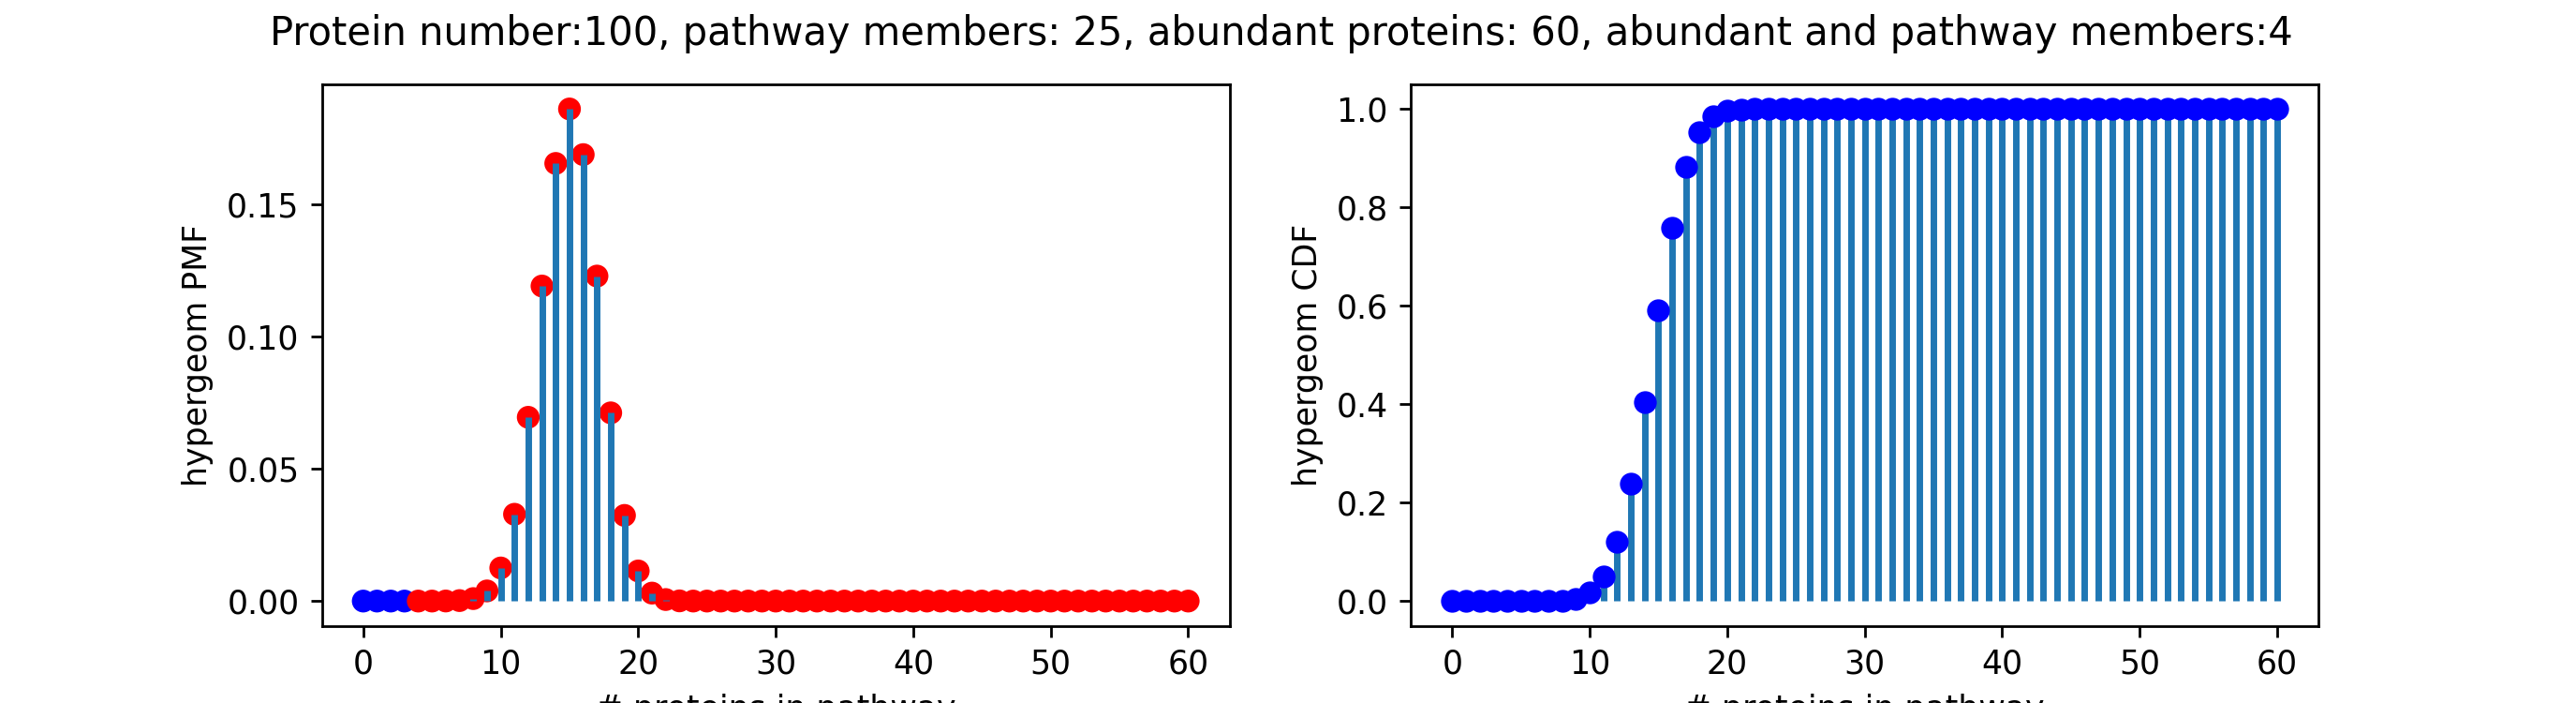

0.9999999833384777

In [19]:
from scipy.stats import hypergeom
saList = df[ df['Log2 Corrected Abundance Ratio'] > 0.0 ]['Accession'].tolist()

def righEnd_pValue(N, n, K, k):
    
    rv = hypergeom(N, K, n)
    x = np.arange(0, n+1)
    pmf_pathway_members = rv.pmf(x)
    cmf_pathway_members = rv.cdf(x)
    fig = plt.figure(figsize=(11, 3))
    ax = fig.add_subplot(121)
    ax.scatter(x, pmf_pathway_members, color = [ 'b' if _x < k else 'r' for _x in x ])
    ax.vlines(x, 0, pmf_pathway_members, lw=2)
    ax.set_xlabel('# proteins in pathway')
    ax.set_ylabel('hypergeom PMF')
    
    ax = fig.add_subplot(122)
    ax.plot(x, cmf_pathway_members, 'bo')
    ax.vlines(x, 0, cmf_pathway_members, lw=2)
    ax.set_xlabel('# proteins in pathway')
    ax.set_ylabel('hypergeom CDF')
    
    fig.suptitle(f"Protein number:{N}, pathway members: {K}, abundant proteins: {n}, abundant and pathway members:{k} ")
    
    p_x = hypergeom(N, K, n).cdf([k - 1])
    return 1.00 - p_x[0]

righEnd_pValue(100, 60, 25, 4)

# Definitions de pathway fonctionels: manipulation de l'ontologie

## Ontologie
Les termes GO sont organisés en une structure hiérarchique ([DAG](https://en.wikipedia.org/wiki/Directed_acyclic_graph)). Dans ce type de graph les liens sont orientés, mais les noeuds fils peuvent avoir plusieurs parents.

Prenez un moment pour vous familliariser avec [sa structure](https://www.ebi.ac.uk/QuickGO/).

Les termes de cette ontologie sont organisés en trois arbres indépendants:
* **biological process**
* **molecular function**
* **cellular component**

On appellera **namespace** chacun de ces trois arbres. On travaillera séparement sur chaque namespace. Nous vous suggerons de commmencer à travailler sur le namespace **biological process**.

### Topologie des arbres de termes GO
Les noeuds sont des termes GO, auxquels nous allons associer des pValue d'enrichissement.

Les feuilles sont les protéines directement annotées par un terme GO.

###### Attention, règle du vrai chemin

*Si une protéine est porteuse d'un terme GO, alors est elle aussi porteuse de tous les parents de ce terme.*

En d'autre terme la liste des protéines associées à un terme GO est l'ensemble des feuilles du sous arbre dont la racine est ce terme GO.

### Comment lire et manipuler une arbre de termes

######  Après le chargement initial de l'ontologie générique  
`go.setOntology(dataDir + "/go.owl")`

##### On créé  l'abre des termes GO membres d'un namespace et qui annotent  une liste de protéines
```python
goTreeObj = go.createGoTree(ns="biological process", proteinList=xpProtList, uniprotCollection=uniprotCollection)
```
Où
* `ns`, est le namespace GO étudié
* `proteinList`, une liste d'identifiants Uniprot
* `uniprotCollection`, une collection d'objet Uniprot



##### API de l'arbre d'annotations


###### Taille de l'abre
Affiche un tuple (feuilles, noeuds, protéines)
```python
goTreeObj.dimensions
```
#### Extraire un sous arbre
```python
sousArbre = goTreeObj.newRoot("transmembrane transport")
```

#### Enumerer les protéines porteuses de termes GO

##### Dans tout l'arbre
```python
proteinList = goTreeObj.getMembers()
```
##### A partir d'un noeud
```python
proteinList = goTreeObj.getMembersByName("transmembrane transport")
proteinList = goTreeObj.getMembersByID("GO:0055085")
```

#### Acceder directement à un noeud
```python
goTerm = goTreeObj.getByName("transmembrane transport")
goTerm = goTreeObj.getByID("GO:0055085")
```

#### Parcourir tous les noeuds d'un arbre
```python
for goTerm in goTreeObj.walk():
    print(goTerm)
```

#### Elager un arbre
On définit une fonction test (retournant vrai ou faux) à appliquer à chaque noeud de l'arbre de départ.
La fonction test recevra en argument le terme GO/objet noeud à analyser.
Si la fonction retourne faux pour un noeud, ce noeud et tous ses descendants seront éliminés dans l'arbre d'arrivée. 

**Exemple**: retirer tous les terme GO n'ayant aucune des protéines `'P75936', 'P76231', 'P0A8S9'` parmi leurs protéines annotées.
```python
def predicat(goTerm):
    return set(goTerm.getMembers()) & set(['P75936', 'P76231', 'P0A8S9'])

goTreeObj_avec_P75936_P76231_P0A8S9 = goTreeObj.drop(predicat)
```

### Chargements des données uniprot et GO génériques
Avec exemple de création d'un arbre de termes GO du namespace "**biological process**".

Afin de vous familliariser, essayer de réaliser les opérations ci-dessus sur l'arbre `goTreeObj`

In [8]:
uniprotCollection = uniprot.UniprotCollection(dataDir +"/dataset")
K12 = uniprot.UniprotCollection(dataDir + "/K12_proteome/")
xpProtList = dfClean['Accession'].tolist()
print("Loading ontology")
go.setOntology(dataDir + "/go.owl")

goTreeObj = go.createGoTree(ns="biological process", proteinList=xpProtList, uniprotCollection=uniprotCollection)

Loading ontology
Loaded
Extracting biological process ontology
Applying true path collapsing
2194 GO terms, 3482 leaves, 1474 proteins


## Analyse de l'enrichissement en terme GO parmi les protéines surabondantes

### Récursivité de l'analyse d'enrichissement

**L'application de la fonction `righEnd_pValue` à chaque terme GO necessite le calcul des paramètres de la loi hypergéométrique:**
* **$N$** , le nombre total de protéines annotées dans le protéome $\Longleftrightarrow$ nombre de feuilles dans l'arbre GO du protéome
* **$n$**, le nombre de protéines surabondantes $\Longleftrightarrow$ nombre de feuilles/protéines surabondante dans l'arbre des protéines experimentales 
* **$K$**, le nombre de protéines annotées par ce terme GO dans le protéome $\Longleftrightarrow$ nombre de feuilles dans le sous arbre de ce terme GO issu de l'arbre GO du protéome
* **$k$**, le nombre de protéines annotées par ce terme GO dans les protéines surabondantes $\Longleftrightarrow$ nombre de feuilles dans le sous arbre de ce terme GO issu de l'arbre GO des protéines expérimentales


##### Ensembles  de protéines
Le calcul des paramètres de chaque terme GO et de la p-value d'enrichissement nécessite donc deux ensembles (listes) de protéines différents:

* Les protéines quantifiées dans l'experience: `xpProtList = dfClean['Accession'].tolist()`
* [Le protéome](https://www.uniprot.org/proteomes/UP000000625) de la bactérie étudiée: `K12 = uniprot.UniprotCollection(dataDir + "/K12_proteome/")`


On a donc choisi le protéome pour définir à chaque terme GO les paramètres $K$ et $N$ du modèle hypergéométrique. 
* Que pensez-vous de ce choix ?
* Quelles seraient les alternatives?

### Application aux protéines étudiées


##### Nous allons donc devoir travailler avec deux arbres d'ontologie GO
Ces arbres diffèrent par leurs noeuds (les termes) et leurs feuilles (les protéines). Pour les besoins de l'exemple nous étudierons le namespace **biological process**.

##### Permier arbre: l'arbre des termes des protéines mesurées dans l'expérience
`xpGoTree_BP = go.createGoTree(ns="biological process", proteinList=xpProtList, uniprotCollection=uniprotCollection)`

Où `xpProtList` est la liste des identifiants Uniprot des protéines expérimentales et `uniprotCollection` une collection d'objets Uniprot précédemment créée.

######  Deuxieme arbre : l'arbre des termes de toutes les protéines de l'organisme étudié
`fullEcoliGoTree_BP = go.createGoTree(ns="biological process", proteinList=K12.list, uniprotCollection=K12)`

Où `K12.list` est la liste des identifiants uniprot du protéome de *E.Coli* et `K12`  une collection d'objets Uniprot précédemment créée.

In [9]:
goTreeObjExp = go.createGoTree(ns="biological process", proteinList=xpProtList, uniprotCollection=uniprotCollection)
goTreeObjRef = go.createGoTree(ns="biological process", proteinList=K12.list, uniprotCollection=K12)

Extracting biological process ontology
Applying true path collapsing
2194 GO terms, 3482 leaves, 1474 proteins
Extracting biological process ontology
Applying true path collapsing
2728 GO terms, 6650 leaves, 3128 proteins


### Calculons la pValue du terme "transmembrane transport"
*Quelle est la probabilité d'observer au moins ce nombre de protéines annotées "transmembrane transport" parmi les protéines surabondantes?*
#### Determinations des paramètres de la loi hypergéométrique

##### 1° Extraire la liste des protéines avec *'Log2 Corrected Abundance Ratio'* > 0.0
Ce sera notre liste de protéines sur-abondantes $\Rightarrow n$

##### 2° Extraire la liste des protéines de E.Coli annotées dans l'arbre GO "protéome total"
Ce sera notre liste de totale de protéines $\Rightarrow N$

##### 3° Extraire la liste des protéines "transmembrane transport"
* Dans l'arbre GO "protéome total" $\Rightarrow K$
* Dans l'arbre GO "expérimental" **ET** surabondates $\Rightarrow k$

##### 4° Appeller la fonction righEnd_pValue
A l'aide des paramètres précedents calculer *la probabilité d'observer au moins $k$ protéines annotées "transmembrane transport" parmi les protéines surabondantes*

*Exemple de figure à obtenir* 
![caption](../figs/TM_pvalue.png)

La pvalue d'enrichissement du terme "transmembrane transport" est de 0.381

0.38143716334525035

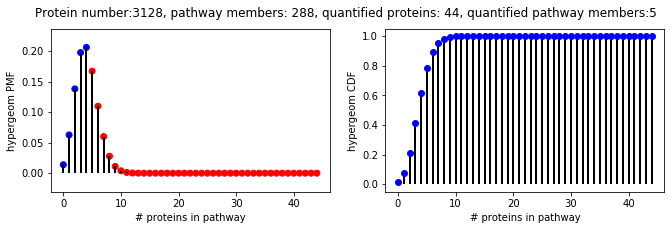

In [26]:
saList = dfClean[ dfClean['Log2 Corrected Abundance Ratio'] > 0.0 ]['Accession'].tolist()
xpList = dfClean['Accession'].tolist()
k = len(set(goTreeObjExp.getMembersByName("transmembrane transport")) & set(saList))
K = len(goTreeObjRef.getMembersByName("transmembrane transport"))
n = len(saList)
N = goTreeObjRef.dimensions[2]
%matplotlib inline
righEnd_pValue(N, n, K, k)

##### Décommentez les deux commandes du namespace de votre choix
* Création de l'arbre GO des protéines experimentales
* Création de l'arbre GO des protéines de référence

In [9]:
#xpGoTree_BP = go.createGoTree(ns="biological process", proteinList=xpProtList, uniprotCollection=uniprotCollection)
#fullEcoliGoTree_BP = go.createGoTree(ns="biological process", proteinList=K12.list, uniprotCollection=K12)

#xpGoTree_MF = go.createGoTree(ns="molecular function", proteinList=xpProtList, uniprotCollection=uniprotCollection)
#fullEcoliGoTree_MF = go.createGoTree(ns="molecular function", proteinList=K12.list, uniprotCollection=K12)

#xpGoTree_CC = go.createGoTree(ns="cellular component", proteinList=xpProtList, uniprotCollection=uniprotCollection)
#fullEcoliGoTree_CC = go.createGoTree(ns="cellular component", proteinList=K12.list, uniprotCollection=K12)


Extracting biological process ontology
Applying true path collapsing
2194 leaves, 3482 nodes, 1474 proteins
Applying true path collapsing
2728 leaves, 6650 nodes, 3128 proteins
Extracting molecular function ontology
Extracting cellular component ontology


## Analyse de l'enrichissement en terme GO parmi les protéines surabondantes - suite

### Analyse de la surreprésentation
On pourrait appliquer la fonction `righEnd_pValue` manuellement à chaque terme de l'arbre.
Mais, pour nous faciliter le travail, la fonction **computeORA** du package *stat_utils.py* permet d'appliquer l'analyse de surreprésentation récursivement, en profondeur, à partir d'un terme GO racine.



#### Estimation récursive des enrichissements

* Choix du terme GO parent à partir duquel l'analyse ORA sera recursivement appliquée
```python
pathWayRoot = xpGoTree.getByName("transmembrane transport")
```

* Définition du terme GO regroupant **tout le protéome**
```python
pathWayBKG = fullEcoliGoTree.getByName("biological process")
```

* Calcul de l'enrichissement en termes GO successifs parmi les protéines surabondantes (ici, *saList*)
```python
oraScores = computeORA(pathWayRoot, saList, pathWayBKG)
```

* Des arbres peuvent également être passés.
```python
tm_transport_GoTree = xpGoTree.newRoot("transmembrane transport")
oraScores = computeORA(tm_transport_GoTree, saList, fullEcoliGoTree)
```

#### Accès aux score d'enrichissements
Vous avez deux moyens d'accéder aux pvalue des différents termes GO

##### La variable oraScores

Elle contient une liste de tuples (pvalue, termeGO), ainsi `print(oraScores[0])` affichera

```python
(0.3826117782409264,
{
    "ID": "GO: 0055085",
    "name": "transmembrane transport",
    "eTag": [
        "P37624",
        "P0AGH1",
        "P75797",
        "P31550",
        "P77348",
        "P06149",
        "P0AF98",
        "P76397",
        "P0AFH2",
        "P0AFH6",
        "Q47622",
        "P60778",
        "P76185",
        "P23843",
        "P0A9V1",
        "Q46863",
        "P77338"
    ],
    "leafCount": 0,
    "features": {
        "Fisher": 0.3826117782409264,
        "Hpg": 0.38143716334525035
    },
    "oNode": obo.GO_0055085,
    "isDAGelem": True,
    "children": [
        "ion transmembrane transport",
        "organic acid transmembrane transport",
        "import across plasma membrane",
        "protein transmembrane transport",
        "carbohydrate transmembrane transport",
        "drug transmembrane transport",
        "purine-containing compound transmembrane transport",
        "nucleoside transmembrane transport",
        "export across plasma membrane",
        "oligopeptide transmembrane transport",
        "regulation of transmembrane transport",
        "transmembrane transporter activity",
        "negative regulation of transmembrane transport",
        "thiamine transmembrane transport",
        "pyrimidine-containing compound transmembrane transport",
        "positive regulation of transmembrane transport",
        "polyamine transmembrane transport"
    ]
})
```
##### L'arbre GO des protéines experimentales 
Chaque noeud stocke sa pvalue, ainsi le parcourt de **l'arbre des protéines expérimentales** suivant 
```python
for n in pathWay.walk():
    print( n.pvalue, n.name, len(n.getMembers(nr=True)) )
```
affichera
```
0.3826117782409264 transmembrane transport 94
0.026319852884717568 ion transmembrane transport 44
None cation transmembrane transport 28
None inorganic cation transmembrane transport 18
None proton transmembrane transport 14
None electron transport coupled proton transport 4
None ATP synthesis coupled proton transport 7
None plasma membrane ATP synthesis coupled proton transport 2
None copper ion transmembrane transport 1
None copper ion export 1
```


#### Mise en forme des résultats des enrichissements
Il vous est demander de créer la fonction `printRankings` qui affichera les pathways par ordre croissant de p-value.
Elle affichera pour chaque terme:
* Le nom du pathway
* La pvalue
* Le nombre de protéines surabondantes membres de ce pathway

In [ ]:
def printRankings(saList,oraScores):
    ranking = [ ( d[0], d[1].name, len( set(d[1].getMembers()) & set(saList) ), len(saList) ) for d in sorted(oraScores, key=lambda x:x[0]) ]
    print(f"ORA scores Rankings:\n{ranking}")
    print('\n---\n')

### Mise en forme "riche" des résultats grâce au notebook
Jupyter permet d'étendre le concept de la méthode **__str__()** afin de produire du contenu HTML. Ainsi, tout objet impémentant une méthode **_repr_html_()** sera affiché, via son rendu HTML, dans la cellule d'un notebook.
```python
class Point():
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
    def _repr_html_(self):
        htmlString = "<table><thead><tr><td>Abscisse</td><td>Ordonnée</td><td>Cote</td></tr></thead>"
        htmlString += f"<tbody><tr><td>{self.x}</td><td>{self.y}</td><td>{self.z}</td></tr></tbody></table>"
        return htmlString
Point(2,3,4)
```
Affichera

![caption](../figs/reprhtml.png)


##### Intégration des résultats à la visualisation du notebook 

En vous inspirant de la fonction ci-dessus, modifier la classe `Rankings` ci-dessous en implémentant une méthode [`_repr_html_`](https://ipython.readthedocs.io/en/stable/config/integrating.html) qui permettra un affichage plus lisible des résultats, comme par exemple:

![caption](../figs/_repr_html_.png)

###### Squelette de la classe de visualisation
```python
class Rankings():
    def __init__(self, oraResults|goTreeObj, proteinList, title="Pathway ORA"):
        pass
    def _repr_html_(self):
        pass
```


#### Appliquer cette analyse à tous les termes GO du namespace de votre choix
"biological process", "molecular function", "cellular component"

#### Visualiser les résultats à l'aide de la classe Rankings

#### Pour aller plus loin

Afficher le nom du pathway dans une balise hyperlien pour permettre d'acceder à la page de description du terme GO.
Les termes GO sont accessibles aux URL de la forme
`http://amigo.geneontology.org/amigo/term/GO:GO_NUMBER`.

Exemple:
http://amigo.geneontology.org/amigo/term/GO:0055085

Vous pouvez en encapsuler les différentes étapes dans une fonction de ce type

```python
    def computePathway(goTermString, xpTreeTerm, bkgTreeTerm, uniprotIdList) -> Rankings
```



##### STEP by STEP solution

In [12]:
pathWay  = goTreeObjExp.getByName("transmembrane transport")
pathWayBackground = goTreeObjRef.getByName("biological process")

In [13]:
def goURL(node):
    return 'http://amigo.geneontology.org/amigo/term/' + str(node.oNode).replace('_', ':').replace('obo.', '')
class Rankings():
    def __init__(self, oraResults, proteinList, title="Pathway ORA"):
        self.title = title
        self.ranks = [ ( d[1], d[0], d[1].name, len( set(d[1].getMembers()) & set(proteinList) ), len(proteinList) ) for d in sorted(oraResults, key=lambda x:x[0]) ]
    def _repr_html_(self):
        t_head = f"<h3>{self.title}</h3><table><thead><th>p-value</th><th>Pathway name</th><th>n</th></thead><tbody>"
        t_foot = '</tbody></table>'
        t_body = '</tr><tr>'.join([ '<td>' + '</td><td>'.join([ str(v) if i != 1 else '<a target="_blank", href="' + goURL(pathwayScore[0]) + '">' + str(v) + '</a>' for i,v in enumerate(pathwayScore[1:-1]) ]) + '</td>' for pathwayScore in self.ranks ])
        t_body = '<tr>' + t_body + '</tr>'
        return t_head + t_body + t_foot

In [14]:
saList = dfClean[ dfClean['Log2 Corrected Abundance Ratio'] > 0.0 ]['Accession'].tolist()
oraScores = computeORA(pathWay, saList, pathWayBackground)
TMT_rankings = Rankings(oraScores,saList, title="transmembrane transport terms")
TMT_rankings

Evaluated 9 / 97 Pathways, based on 44 proteins


0.026319852884717568,ion transmembrane transport,5
0.04106508166120274,L-glutamate transmembrane transport,1
0.12358508050517482,drug transmembrane transport,2
0.22290599826510718,L-alpha-amino acid transmembrane transport,1
0.3619566723145079,amino acid transmembrane transport,1
0.3826117782409264,transmembrane transport,5
0.46911833019397486,carboxylic acid transmembrane transport,1
0.46911833019397486,organic acid transmembrane transport,1
0.571013396124047,anion transmembrane transport,1


#### Single function solution

In [16]:
def computePathway(goTermString, xpTreeTerm, bkgTreeTerm, bkgTermString, uniprotIdList) :
    pathWaySetRoot    = xpTreeTerm.getByName(goTermString)
    pathWaySetRootBKG = bkgTreeTerm.getByName(bkgTermString)
    oraScore = computeORA(pathWaySetRoot, uniprotIdList, pathWaySetRootBKG)
    return oraScore, Rankings(oraScore,uniprotIdList, title=goTermString)

saList = dfClean[ dfClean['Log2 Corrected Abundance Ratio'] > 0.0 ]['Accession'].tolist()
bp_analysis = computePathway("transmembrane transport", goTreeObjExp, goTreeObjRef, "biological process", saList)
bp_analysis[1]

Evaluated 9 / 97 Pathways, based on 44 proteins


0.026319852884717568,ion transmembrane transport,5
0.04106508166120274,L-glutamate transmembrane transport,1
0.12358508050517482,drug transmembrane transport,2
0.22290599826510718,L-alpha-amino acid transmembrane transport,1
0.3619566723145079,amino acid transmembrane transport,1
0.3826117782409264,transmembrane transport,5
0.46911833019397486,carboxylic acid transmembrane transport,1
0.46911833019397486,organic acid transmembrane transport,1
0.571013396124047,anion transmembrane transport,1


In [84]:
saList = dfClean[ dfClean['Log2 Corrected Abundance Ratio'] > 0.0 ]['Accession'].tolist()
bp_analysis = computePathway("biological process", xpGoTree_BP, fullEcoliGoTree_BP, "biological process", saList)
bp_analysis[1]

Evaluated 297 / 2193 Pathways, based on 44 proteins


3.0740143676824805e-06,siderophore transport,5
1.4333376891745052e-05,iron coordination entity transport,5
2.9305999920744405e-05,protein insertion into membrane,4
3.1801614970675325e-05,membrane organization,5
5.221318723734416e-05,Gram-negative-bacterium-type cell outer membrane assembly,4
5.221318723734416e-05,membrane assembly,4
6.758963970377286e-05,establishment of protein localization to membrane,4
0.0001285368129330478,iron ion transport,5
0.00019634523788932085,ion transport,13
0.00023663274449265561,protein localization to membrane,4
0.0002536535809632806,macromolecule localization,8


In [85]:
saList = dfClean[ dfClean['Log2 Corrected Abundance Ratio'] > 0.0 ]['Accession'].tolist()
mf_analysis = computePathway("molecular function", xpGoTree_MF, fullEcoliGoTree_MF, "molecular function", saList)
mf_analysis[1]

Evaluated 135 / 1693 Pathways, based on 44 proteins


4.079020213798363e-08,porin activity,8
5.4812535572080815e-08,channel activity,9
6.842147218688606e-05,protein domain specific binding,4
0.00013509993026375214,signaling receptor activity,4
0.0005635570539397125,protein N-terminus binding,2
0.0011171295071511346,5S rRNA binding,2
0.0011171295071511346,"protein binding, bridging",2
0.0011171295071511346,colicin transmembrane transporter activity,2
0.0011171295071511346,bacteriocin transmembrane transporter activity,2
0.0012444576470391796,ion channel activity,3
0.0018912053184272182,molecular transducer activity,4


In [86]:
saList = dfClean[ dfClean['Log2 Corrected Abundance Ratio'] > 0.0 ]['Accession'].tolist()
mf_analysis = computePathway("cellular component", xpGoTree_CC, fullEcoliGoTree_CC, "cellular component", saList)
mf_analysis[1]

Evaluated 55 / 208 Pathways, based on 44 proteins


1.0215714911346547e-23,external encapsulating structure part,26
1.0215714911346547e-23,cell outer membrane,26
7.850474882875648e-23,outer membrane,26
9.371662207134898e-23,external encapsulating structure,26
7.407416447732138e-19,cell envelope,29
8.156120114973369e-19,envelope,29
8.303624740016611e-11,intrinsic component of cell outer membrane,9
8.250388960599696e-07,integral component of cell outer membrane,5
1.0578539711794813e-06,pore complex,6
3.3340106553038095e-06,Bam protein complex,4
2.214563121907388e-05,membrane protein complex,11


## Serialisation des résultats

#### Représentation des résultats
Afin de faciliter le travail des séances suivantes, vous devez produire une représentation des résultats que vous venez de construire dans un dictionnaire de la forme.
```json
    { 
        "plasma membrane" : {
            "name" : "plasma membrane",
            "pvalue" : 0.9999980015962491,
            "proteineTotal" : [uniprotID, ..],
            "proteineSA" : [uniprotID, ..]
    
           },
       ....
     }
```
Puis vous l'écrirez dans un fichier au [format JSON](https://en.wikipedia.org/wiki/JSON).

#### Représentation de l'objet arbre
On pourrait souhaiter travailler sur la représentation graphique de l'analyse d'enrichissement en s'appuyant sur l'ontologie. On a donc besoin d'ecrire l'état de nos objets **GoTree** pour pouvoir les réulitlier ulterieurement (lors du TP5). La librarie standard fournit le module [pickle](https://docs.python.org/3/library/pickle.html). Cette librarie a deux avantages comparés à la sérialisation en JSON:
* La description de l'objet est automatique, vous n'avez pas besoin d'explicitement spécifier les attributs à sauvgegarder.
* Les méthodes sont aussi sauvegardées, à la désérialieation la variable produite est donc un objet de "plein-droit"

Le format Pickle a cependant quelques limites, essayer d'ecrire un fichier au format pickle représentant l'objet **goTree** et prêtez attention au message s'affichant.

In [20]:
import json

res = {}

for node in goTreeObjExp.walk():
    if node.pvalue:
         res[ node.name ] = {
             "name"          : node.name,
             "pvalue"        : node.pvalue,
             "proteineTotal" : node.getMembers(nr=True),
             "proteineSA"    : list ( set (saList) & set(node.getMembers(nr=True)) )
         }
        
    
with open('TP_ORA.json', 'w') as fp:
    json.dump(res, fp)
res

{'amino acid transmembrane transport': {'name': 'amino acid transmembrane transport',
  'pvalue': 0.3619566723145079,
  'proteineTotal': ['P30860',
   'P0A830',
   'P37902',
   'P0AER8',
   'P23886',
   'P37774',
   'P0AAF6',
   'P29018',
   'P0AAG3',
   'P07109',
   'P45577',
   'P23173',
   'P0C0L7'],
  'proteineSA': ['P0AER8']},
 'L-alpha-amino acid transmembrane transport': {'name': 'L-alpha-amino acid transmembrane transport',
  'pvalue': 0.22290599826510718,
  'proteineTotal': ['P30860',
   'P0AER8',
   'P37902',
   'P0AAF6',
   'P0AAG3',
   'P07109',
   'P0A830'],
  'proteineSA': ['P0AER8']},
 'L-glutamate transmembrane transport': {'name': 'L-glutamate transmembrane transport',
  'pvalue': 0.04106508166120274,
  'proteineTotal': ['P0AER8', 'P37902'],
  'proteineSA': ['P0AER8']},
 'carboxylic acid transmembrane transport': {'name': 'carboxylic acid transmembrane transport',
  'pvalue': 0.46911833019397486,
  'proteineTotal': ['P30860',
   'P0A830',
   'P37902',
   'P0AER8',
   '

In [ ]:
import pickle
pickableTree = goTreeObjExp.makePickable()
with open("testGoTree.pkl", 'wb') as fp:
    pickle.dump(pickableTree, fp, protocol=pickle.HIGHEST_PROTOCOL)